In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm, t
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
import country_converter as coco
import seaborn as sns
from CoefPlot import CoefPlot
from sklearn.linear_model import LinearRegression as OLS
import statsmodels.api as sm 
import os

In [2]:
current_folder = globals()['_dh'][0]
rootdir = os.path.dirname(os.path.dirname(current_folder))
wdir = os.path.join(rootdir, '_2_intermediate', 'data')
outdir = os.path.join(rootdir, '_3_figures_tables', 'data')

In [3]:
print(t.ppf(0.975, 1000))
print(norm.ppf(0.975))

1.9623390808264074
1.959963984540054


# Coefficient plots

In [4]:
dfall = pd.read_csv(os.path.join(wdir, '_distlevel_mig_relshare_regressions.csv'))
dfall['se'] = dfall['se'].astype(np.float64)
dfall['err_t'] = dfall.se*t.ppf(0.975, dfall.n)
dfall['ordr'] = 0
dfall.loc[dfall.migshr_fe == 'unweighted', 'ordr'] = 1
dfall.loc[dfall.migshr_fe == 'weighted', 'ordr'] = 2

dfall.loc[dfall.migshr_fe == 'none', 'migshr_fe'] = 'no origin FE'
dfall.loc[dfall.migshr_fe == 'unweighted', 'migshr_fe'] = 'unweighted origin FE'
dfall.loc[dfall.migshr_fe == 'weighted', 'migshr_fe'] = 'weighted origin FE'

dfall.loc[dfall.major_religion == 'christian', 'major_religion'] = 'Christian'
dfall.loc[dfall.major_religion == 'muslim', 'major_religion'] = 'Muslim'
dfall.loc[dfall.major_religion == 'traditional', 'major_religion'] = 'Traditional'

dfall.loc[dfall.weighted == 'no', 'weighted'] = 'unweighted'
dfall.loc[dfall.weighted == 'yes', 'weighted'] = 'weighted'

In [5]:
dfall

,weighted,relshr,migshr_fe,major_religion,b,se,n,err_t,ordr
0,weighted,basic,no origin FE,Christian,-0.124407,0.050131,936,0.098382,0
1,weighted,basic,no origin FE,Muslim,-0.244356,0.058523,927,0.114853,0
2,weighted,basic,no origin FE,Traditional,-0.453035,0.112394,733,0.220652,0
3,weighted,basic,unweighted origin FE,Christian,-0.169971,0.030378,936,0.059617,1
4,weighted,basic,unweighted origin FE,Muslim,-0.279967,0.033848,927,0.066427,1
5,weighted,basic,unweighted origin FE,Traditional,-0.363230,0.084432,733,0.165757,1
6,weighted,basic,weighted origin FE,Christian,-0.151967,0.023061,936,0.045258,2
7,weighted,basic,weighted origin FE,Muslim,-0.270454,0.036555,927,0.071740,2
8,weighted,basic,weighted origin FE,Traditional,-0.438590,0.095786,733,0.188047,2
9,weighted,lito,no origin FE,Christian,-0.099081,0.045327,931,0.088955,0


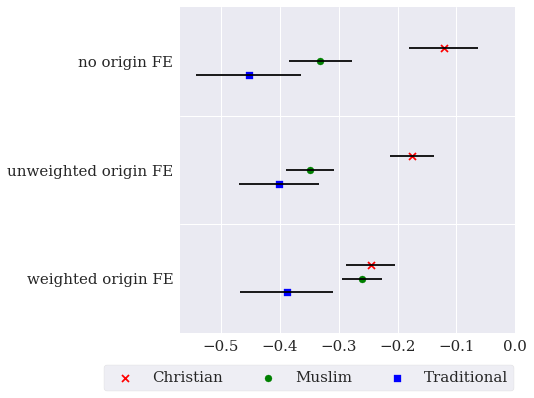

In [6]:
df = dfall[(dfall.weighted == 'unweighted') & 
           (dfall.relshr == 'basic')].copy(deep=True)

cp = CoefPlot(df)
f = cp.grouped_dotplot('b', 'major_religion', 'migshr_fe', err='err_t', figsize=(6,6), 
                        order_groups_by_variable='ordr',
                        within_group_order=['Christian', 'Muslim', 'Traditional'],
                        zero_line=True, group_separators=True,
                        legend=True, legend_bbox=(-0.25,-0.2), legend_columns=3)

In [7]:
for w in ['weighted', 'unweighted']:
    for relshr in ['basic', 'lito']:

        df = dfall[(dfall.weighted == w) & 
                   (dfall.relshr == relshr)].copy(deep=True)

        cp = CoefPlot(df)
        f = cp.grouped_dotplot('b', 'major_religion', 'migshr_fe', err='err_t', figsize=(6,6), 
                                order_groups_by_variable='ordr',
                                within_group_order=['Christian', 'Muslim', 'Traditional'],
                                zero_line=True, group_separators=True,
                                legend=True, legend_bbox=(-0.25,-0.2), legend_columns=3)

        f.savefig('{}/_9a_distlevel_mig_relshare_{}_{}.pdf'.format(outdir, w, relshr), bbox_inches='tight', dpi=100)
        plt.close(f)

# Scatter plots

## christian and muslim IM levels on shares (both residualized)

### not controlling for lit old

In [8]:
df = pd.read_csv(os.path.join(wdir, '_distlevel_mig_relshare_regressions_residuals_for_scatter_cm_level.csv'))
df

,xc_nofe,yc_nofe,xm_nofe,ym_nofe,xc_uwfe,yc_uwfe,xm_uwfe,ym_uwfe,xc_wfe,yc_wfe,xm_wfe,ym_wfe
0,-0.269506,-0.145458,0.378011,-0.167167,-0.269506,0.002932,0.378011,-0.018777,-0.269506,-0.038870,0.378011,-0.060579
1,-0.291718,-0.130240,0.513622,-0.144504,-0.291718,-0.009288,0.513622,-0.023551,-0.291718,-0.043706,0.513622,-0.057969
2,-0.237720,-0.082798,0.536141,-0.142360,-0.237720,-0.026386,0.536141,-0.085947,-0.237720,-0.013038,0.536141,-0.072599
3,-0.391049,0.065596,0.704403,-0.165676,-0.391049,0.167848,0.704403,-0.063424,-0.391049,0.168106,0.704403,-0.063167
4,-0.376359,0.188326,0.708985,-0.166403,-0.376359,0.077766,0.708985,-0.276964,-0.376359,0.282775,0.708985,-0.071954
...,...,...,...,...,...,...,...,...,...,...,...,...
931,0.027691,-0.048875,NaN,NaN,0.027691,-0.142179,NaN,NaN,0.027691,-0.006496,NaN,NaN
932,-0.058522,-0.085706,NaN,NaN,-0.058522,0.070992,NaN,NaN,-0.058522,0.005556,NaN,NaN
933,0.025857,0.064938,NaN,NaN,0.025857,-0.002538,NaN,NaN,0.025857,-0.006124,NaN,NaN
934,-0.122969,-0.099379,NaN,NaN,-0.122969,0.107554,NaN,NaN,-0.122969,0.011048,NaN,NaN


In [9]:
# xlims = [(-0.4, 0.3), (-0.3, 0.5)]
ylims = [(-0.32, 0.3), (-0.32, 0.3), (-0.32, 0.3), (-0.32, 0.3), (-0.32, 0.3), (-0.32, 0.3)]
for imr, mr in enumerate(['c_nofe', 'm_nofe', 'c_uwfe', 'm_uwfe', 'c_wfe', 'm_wfe']):
    dfr = df[[f'x{mr}', f'y{mr}']].dropna()
    
    #####################################################
    # unweighted
    #####################################################
    m = OLS()
    m.fit(dfr[[f'x{mr}']], dfr[f'y{mr}'])
    
    xsm = sm.add_constant(dfr[[f'x{mr}']])
    ressm = sm.OLS(dfr[f'y{mr}'],xsm).fit()
    
    f, ax = plt.subplots(1,1, figsize=(10, 6))
    ax = sns.regplot(x=dfr[f'x{mr}'], y=dfr[f'y{mr}'], ax=ax, x_bins=15, x_ci=None)
    ax.set_xlabel('district population share (residual)', size=15)
    ax.set_ylabel('migration share (residual)', size=15)
    ax.tick_params(axis='both', which='major', labelsize=15)
    # ax.set_xlim(xlims[imr])
    ax.set_ylim(ylims[imr])

    if m.coef_[0] < 0:
        slope = ' - ' + f'{m.coef_[0]:.2f}'[1:]
    else:
        slope = f' + {m.coef_[0]:.2f}'
        
    print(mr, 'SLOPE: ', slope, 'SE: ', ressm.bse[1])
        
    text = 'Migrant share = $\\alpha_c$%s$\\times$ pop share' % slope
    ax.annotate(text, xy=(0.0, 1.05), xycoords='axes fraction', fontsize=15,
                horizontalalignment='left', verticalalignment='top')      
    
    f.savefig('{}/_9b_distlevel_mig_relshare_illustration_binscatter_{}_unweighted_no_litcontrol.pdf'.format(outdir, mr), bbox_inches='tight', dpi=100)
    plt.close(f)

c_nofe SLOPE:   - 0.12 SE:  0.023389797399576945
m_nofe SLOPE:   - 0.33 SE:  0.02477861218944616
c_uwfe SLOPE:   - 0.18 SE:  0.013957280511543496
m_uwfe SLOPE:   - 0.35 SE:  0.018091821149798792
c_wfe SLOPE:   - 0.25 SE:  0.013417566802464538
m_wfe SLOPE:   - 0.26 SE:  0.019497577311097178


### controling for litold

In [10]:
df = pd.read_csv(os.path.join(wdir, '_distlevel_mig_relshare_regressions_residuals_for_scatter_cm_level_litocontrol.csv'))
df

,xc_nofe,yc_nofe,xm_nofe,ym_nofe,xc_uwfe,yc_uwfe,xm_uwfe,ym_uwfe,xc_wfe,yc_wfe,xm_wfe,ym_wfe
0,-0.256093,-0.131780,0.351709,-0.143761,-0.256093,0.003573,0.351709,-0.007447,-0.256093,-0.037636,0.351709,-0.052733
1,-0.268310,-0.106369,0.488001,-0.121703,-0.268310,-0.008169,0.488001,-0.012514,-0.268310,-0.041551,0.488001,-0.050326
2,-0.216132,-0.060783,0.511718,-0.120626,-0.216132,-0.025354,0.511718,-0.075426,-0.216132,-0.011051,0.511718,-0.065313
3,-0.415504,0.040658,0.674109,-0.138717,-0.415504,0.166679,0.674109,-0.050374,-0.415504,0.165855,0.674109,-0.054130
4,-0.477419,0.085269,0.681493,-0.141937,-0.477419,0.072935,0.681493,-0.265121,-0.477419,0.273474,0.681493,-0.063753
...,...,...,...,...,...,...,...,...,...,...,...,...
926,0.051135,-0.024968,NaN,NaN,0.051135,-0.141058,NaN,NaN,0.051135,-0.004338,NaN,NaN
927,-0.016630,-0.042986,NaN,NaN,-0.016630,0.072994,NaN,NaN,-0.016630,0.009411,NaN,NaN
928,-0.004597,0.033881,NaN,NaN,-0.004597,-0.003994,NaN,NaN,-0.004597,-0.008927,NaN,NaN
929,-0.086943,-0.062641,NaN,NaN,-0.086943,0.109276,NaN,NaN,-0.086943,0.014363,NaN,NaN


In [11]:
# xlims = [(-0.4, 0.3), (-0.3, 0.5)]
ylims = [(-0.32, 0.3), (-0.32, 0.3), (-0.32, 0.3), (-0.32, 0.3), (-0.32, 0.3), (-0.32, 0.3)]
for imr, mr in enumerate(['c_nofe', 'm_nofe', 'c_uwfe', 'm_uwfe', 'c_wfe', 'm_wfe']):
    dfr = df[[f'x{mr}', f'y{mr}']].dropna()
    
    #####################################################
    # unweighted
    #####################################################
    m = OLS()
    m.fit(dfr[[f'x{mr}']], dfr[f'y{mr}'])
    
    xsm = sm.add_constant(dfr[[f'x{mr}']])
    ressm = sm.OLS(dfr[f'y{mr}'],xsm).fit()
    
    f, ax = plt.subplots(1,1, figsize=(10, 6))
    ax = sns.regplot(x=dfr[f'x{mr}'], y=dfr[f'y{mr}'], ax=ax, x_bins=15, x_ci=None)
    ax.set_xlabel('district population share (residual)', size=15)
    ax.set_ylabel('migration share (residual)', size=15)
    ax.tick_params(axis='both', which='major', labelsize=15)
    # ax.set_xlim(xlims[imr])
    ax.set_ylim(ylims[imr])

    if m.coef_[0] < 0:
        slope = ' - ' + f'{m.coef_[0]:.2f}'[1:]
    else:
        slope = f' + {m.coef_[0]:.2f}'
        
    print(mr, 'SLOPE: ', slope, 'SE: ', ressm.bse[1])
        
    text = 'Migrant share = $\\alpha_c$%s$\\times$ pop share' % slope
    ax.annotate(text, xy=(0.0, 1.05), xycoords='axes fraction', fontsize=15,
                horizontalalignment='left', verticalalignment='top')      
    
    f.savefig('{}/_9c_distlevel_mig_relshare_illustration_binscatter_{}_unweighted_with_litcontrol.pdf'.format(outdir, mr), bbox_inches='tight', dpi=100)
    plt.close(f)

c_nofe SLOPE:   - 0.20 SE:  0.02171101789850171
m_nofe SLOPE:   - 0.26 SE:  0.023722186718644823
c_uwfe SLOPE:   - 0.19 SE:  0.014270124841269142
m_uwfe SLOPE:   - 0.32 SE:  0.01754347099398373
c_wfe SLOPE:   - 0.27 SE:  0.013241864464020408
m_wfe SLOPE:   - 0.23 SE:  0.018140503019208363


## gaps

### not controlling for litold

In [12]:
df = pd.read_csv(os.path.join(wdir, '_distlevel_mig_relshare_regressions_residuals_for_scatter_cm_gap.csv'))
df

,xnofe,xgnofe,ynofe,xuwfe,xguwfe,yuwfe,xwfe,xgwfe,ywfe
0,0.378011,-0.647516,0.021709,0.378011,-0.647516,0.021709,0.378011,-0.647516,0.021709
1,0.513622,-0.805340,0.014263,0.513622,-0.805340,0.014263,0.513622,-0.805340,0.014263
2,0.536141,-0.773861,0.059561,0.536141,-0.773861,0.059561,0.536141,-0.773861,0.059561
3,0.704403,-1.095453,0.231273,0.704403,-1.095453,0.231273,0.704403,-1.095453,0.231273
4,0.708985,-1.085343,0.354729,0.708985,-1.085343,0.354729,0.708985,-1.085343,0.354729
...,...,...,...,...,...,...,...,...,...
921,-0.002132,0.031222,-0.064228,-0.002132,0.031222,-0.117879,-0.002132,0.031222,-0.118197
922,-0.002284,-0.054838,-0.017725,-0.002284,-0.054838,-0.016952,-0.002284,-0.054838,0.000065
923,-0.001650,0.028906,-0.126010,-0.001650,0.028906,-0.127186,-0.001650,0.028906,-0.126106
924,-0.002048,-0.119521,0.218602,-0.002048,-0.119521,0.233308,-0.002048,-0.119521,0.235041


In [13]:
xlims = [(-0.35, 0.55)]
ylims = [(-0.07, 0.07)]
for imr, mr in enumerate(['nofe', 'uwfe', 'wfe']):
    
    for xs in ['', 'g']:
    
        dfr = df[[f'x{xs}{mr}', f'y{mr}']].dropna()

        #####################################################
        # unweighted
        #####################################################
        m = OLS()
        m.fit(dfr[[f'x{xs}{mr}']], dfr[f'y{mr}'])
        
        xsm = sm.add_constant(dfr[[f'x{xs}{mr}']])
        ressm = sm.OLS(dfr[f'y{mr}'],xsm).fit()

        f, ax = plt.subplots(1,1, figsize=(10, 6))
        ax = sns.regplot(x=dfr[f'x{xs}{mr}'], y=dfr[f'y{mr}'], ax=ax, x_bins=15, x_ci=None)
        if xs == '':
            ax.set_xlabel('district Muslim population share (residual)', size=15)
        else:
            ax.set_xlabel('district Christian - Muslim population share gap (residual)', size=15)
        ax.set_ylabel('Christian - Muslim migration share gap (residual)', size=15)
        ax.tick_params(axis='both', which='major', labelsize=15)
        # ax.set_xlim(xlims[0])
        # ax.set_ylim(ylims[0])

        if m.coef_[0] < 0:
            slope = ' - ' + f'{m.coef_[0]:.2f}'[1:]
        else:
            slope = f' + {m.coef_[0]:.2f}'
            
        print(mr, 'SLOPE: ', slope, 'SE: ', ressm.bse[1])
            
        if xs == '':     
            text = 'C-M Migrant share-Gap = $\\alpha_c$%s$\\times$ Muslim pop share' % slope
        else:
            text = 'C-M Migrant share-Gap = $\\alpha_c$%s$\\times$ C - M population share gap' % slope
        ax.annotate(text, xy=(0.0, 1.05), xycoords='axes fraction', fontsize=15,
                    horizontalalignment='left', verticalalignment='top')      

        f.savefig('{}/_9b_distlevel_miggapcm_relshare_illustration_binscatter_{}_unweighted_no_litcontrol.pdf'.format(outdir, xs+mr),
                  bbox_inches='tight', dpi=100)
        plt.close(f)

nofe SLOPE:   + 0.46 SE:  0.02262102540936315
nofe SLOPE:   - 0.25 SE:  0.012826038151449984
uwfe SLOPE:   + 0.46 SE:  0.02223402912380086
uwfe SLOPE:   - 0.25 SE:  0.012603410670466634
wfe SLOPE:   + 0.46 SE:  0.022422587505669757
wfe SLOPE:   - 0.25 SE:  0.012713948628501611


### controlling for litold

In [14]:
df = pd.read_csv(os.path.join(wdir, '_distlevel_mig_relshare_regressions_residuals_for_scatter_cm_gap_litocontrol.csv'))
df

,xnofe,xgnofe,ynofe,xuwfe,xguwfe,yuwfe,xwfe,xgwfe,ywfe
0,0.352209,-0.591394,0.007117,0.352209,-0.591394,0.007955,0.352209,-0.591394,0.007708
1,0.492367,-0.749756,0.007300,0.492367,-0.749756,0.007913,0.492367,-0.749756,0.007680
2,0.515609,-0.720941,0.052416,0.515609,-0.720941,0.053014,0.515609,-0.720941,0.052791
3,0.659718,-1.034333,0.186487,0.659718,-1.034333,0.188236,0.659718,-1.034333,0.187925
4,0.638851,-1.036841,0.258789,0.638851,-1.036841,0.261926,0.638851,-1.036841,0.261592
...,...,...,...,...,...,...,...,...,...
885,-0.186455,0.328072,-0.062521,-0.186455,0.328072,-0.058250,-0.186455,0.328072,-0.059237
886,-0.068445,0.086179,0.008592,-0.068445,0.086179,-0.006943,-0.068445,0.086179,0.036356
887,0.140071,-0.243280,-0.032569,0.140071,-0.243280,-0.039573,0.140071,-0.243280,-0.037706
888,-0.010052,-0.074619,0.222718,-0.010052,-0.074619,0.236530,-0.010052,-0.074619,0.237647


In [15]:
xlims = [(-0.35, 0.55)]
ylims = [(-0.07, 0.07)]
for imr, mr in enumerate(['nofe', 'uwfe', 'wfe']):
    
    for xs in ['', 'g']:
    
        dfr = df[[f'x{xs}{mr}', f'y{mr}']].dropna()

        #####################################################
        # unweighted
        #####################################################
        m = OLS()
        m.fit(dfr[[f'x{xs}{mr}']], dfr[f'y{mr}'])
        
        xsm = sm.add_constant(dfr[[f'x{xs}{mr}']])
        ressm = sm.OLS(dfr[f'y{mr}'],xsm).fit()

        f, ax = plt.subplots(1,1, figsize=(10, 6))
        ax = sns.regplot(x=dfr[f'x{xs}{mr}'], y=dfr[f'y{mr}'], ax=ax, x_bins=15, x_ci=None)
        if xs == '':
            ax.set_xlabel('district Muslim population share (residual)', size=15)
        else:
            ax.set_xlabel('district Christian - Muslim population share gap (residual)', size=15)
        ax.set_ylabel('Christian - Muslim migration share gap (residual)', size=15)
        ax.tick_params(axis='both', which='major', labelsize=15)
        # ax.set_xlim(xlims[0])
        # ax.set_ylim(ylims[0])

        if m.coef_[0] < 0:
            slope = ' - ' + f'{m.coef_[0]:.2f}'[1:]
        else:
            slope = f' + {m.coef_[0]:.2f}'
            
        print(mr, 'SLOPE: ', slope, 'SE: ', ressm.bse[1])
            
        if xs == '':     
            text = 'C-M Migrant share-Gap = $\\alpha_c$%s$\\times$ Muslim pop share' % slope
        else:
            text = 'C-M Migrant share-Gap = $\\alpha_c$%s$\\times$ C - M population share gap' % slope
        ax.annotate(text, xy=(0.0, 1.05), xycoords='axes fraction', fontsize=15,
                    horizontalalignment='left', verticalalignment='top')      

        f.savefig('{}/_9c_distlevel_miggapcm_relshare_illustration_binscatter_{}_unweighted_with_litcontrol.pdf'.format(outdir, xs+mr),
                  bbox_inches='tight', dpi=100)
        plt.close(f)

nofe SLOPE:   + 0.41 SE:  0.021525587601595543
nofe SLOPE:   - 0.23 SE:  0.01223549113918698
uwfe SLOPE:   + 0.41 SE:  0.02120995174818588
uwfe SLOPE:   - 0.23 SE:  0.012055896772575675
wfe SLOPE:   + 0.41 SE:  0.02139231069639571
wfe SLOPE:   - 0.23 SE:  0.012163184586195306
